# Datasets in Sktlearn

大多數在 scikit-learn 的機器學習演算法的輸入皆為``numpy``的陣列(矩陣) $X$. $X$ 的維度為 $(n_{samples}, n_{features})$ (每一列代表一筆資料，而每一行則代表其特徵).

> **n_samples**: 資料量的總大小. 資料可以是文件、音檔、影片檔、CSV的一列等。

> **n_features**: 用來描述資料特徵的維度。

特徵維度必須事先決定，如果維度很大不過多數資料為0的話可以用 ``scipy.sparse`` 矩陣來代替``numpy`` 陣列

## Getting started to play with data

機器學習中一個著名的資料庫為 **iris database** 這個資料庫針對不同的三種iris flower(鳶尾花) 四個特徵量測存在 CSV 中。

特徵(Features) 為:
 	
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

三種不同的花:
 	
- Iris Setosa
- Iris Versicolour
- Iris Virginica


In [78]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

<IPython.core.display.Image object>

Iris Setosa



<IPython.core.display.Image object>

Iris Versicolor



<IPython.core.display.Image object>

Iris Virginica


![](https://i.imgur.com/EtjwQpe.png)
"Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

將database中的dict型別資料讀進來看看有哪些主要的資料

In [65]:
for key,value in iris.items() :
    try:
        print (key,value.shape)
    except:
        print (key)
print(iris['feature_names'])

('target_names', (3,))
('data', (150, 4))
('target', (150,))
DESCR
feature_names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


先看看兩個維度

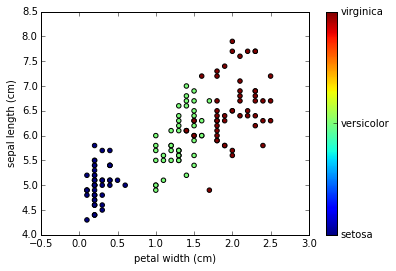

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

x_index = 3
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

為了用視覺化方式呈現這個資料集，我們先使用PCA演算法將資料維度降低至3

In [77]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)

接下來將三個維度的資料立用mpl_toolkits.mplot3d.Axes3D 建立三維繪圖空間，並利用 scatter以三個特徵資料數值當成座標繪入空間，並以三種iris之數值 Y，來指定資料點的顏色。我們可以看出三種iris中，有一種明顯的可以與其他兩種區別，而另外兩種則無法明顯區別。

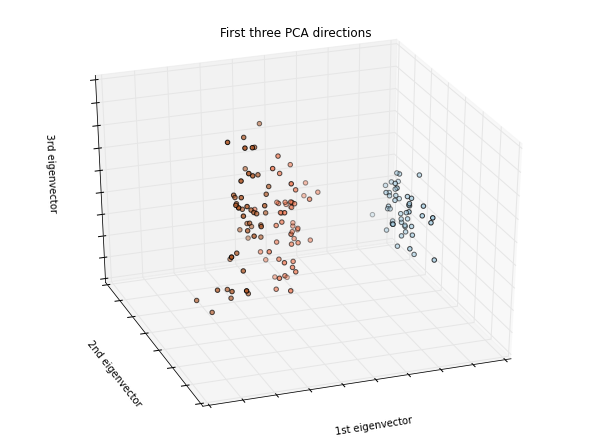

In [68]:
Y = iris.target

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

來看看第一筆資料的樣子(``data``欄位)!!

In [69]:
n_samples, n_features = iris.data.shape
print n_samples, n_features
iris.data[0]

150 4


array([ 5.1,  3.5,  1.4,  0.2])

相對應150筆資料的label Y存在``target``

In [70]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

三種花的名稱 ``target_names``:

In [72]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

## Another Dataset

另一個資料庫維``手寫數字資料庫``，用同樣的方法來看看資料長什麼樣

In [73]:
#載入數字資料集
digits = datasets.load_digits()
#第一張圖片
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

解析度有點低XD

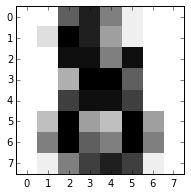

In [74]:
#畫出第一個圖片
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [75]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

('images', (1797, 8, 8))
('data', (1797, 64))
('target_names', (10,))
DESCR
('target', (1797,))


target有十類(0~9)，跟``iris``比較不一樣的是這次多一個images的欄位，我們有1797筆資料每個資料為一個8x8的影像矩陣，特徵為將8x8像素攤平成一維陣列(64個)，來看一些其他影像

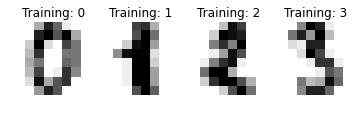

In [76]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## Appendix

這兩筆資料哪來的

In [34]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

這個描述檔說明了這個資料集是在 1936年時由Fisher建立，為圖形識別領域之重要經典範例。共例用四種特徵來分類三種鳶尾花

In [35]:
print(digits['DESCR'])

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

這個描述檔說明了這個資料集是在 1998年時由E. Alpaydin, C. Kaynak ，Department of Computer Engineering Bogazici University, Istanbul Turkey 建立的。數字的筆跡總共來自43個人，一開始取像時為32x32的點陣影像，之後經運算處理形成 8x8影像，其中灰階記錄的範圍則為0~16的整數。

其他的資料庫

In [36]:
from sklearn import datasets
# 用tab來看看sklearn內建的三類資料庫有哪些吧
# datasets.fetch
# datasets.load_
# datasets.make_

## Reference
[1] http://scikit-learn.org/stable/index.html

[2] https://www.gitbook.com/book/htygithub/machine-learning-python/details

[3] https://github.com/amueller/scipy-2016-sklearn/tree/master/notebooks

[4] https://github.com/jakevdp/sklearn_tutorial